In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

# score per step

In [82]:
table_2_df = pd.read_csv('../if_agents/jericho-metadata/table_2_df.csv')

def score_per_step(json_paths, labels, game_name):
    data_lsts = [json.load(open(json_path, 'r')) for json_path in json_paths]
    dfs = [pd.DataFrame(data) for data in data_lsts]
    # Create a new figure
    plt.figure()
    
    for lab, df in zip(labels, dfs):
        plt.plot(df.index, df['score'], label=lab)
        
    try:
        max_score = int(table_2_df[table_2_df['game'] == game_name]['max_score'])
    except:
        max_score = 'unknown'
    if not max_score == 'unknown':
        plt.axhline(y=max_score, color='r', linestyle=':')

    # Set the title and labels
    plt.title(f"Score per step for game '{game_name}'")
    plt.xlabel('Step')
    plt.ylabel('Score')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

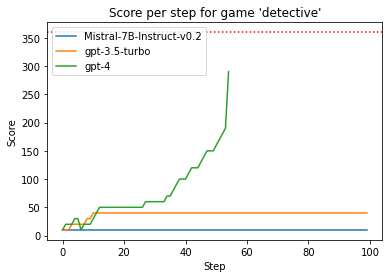

In [48]:
score_per_step(
    [
        '/Users/mirandamelodies99/code/if-agents/experiments/mistral-detective_1709364418.261414/detective.z5.json',
        '/Users/mirandamelodies99/code/if-agents/experiments/autoreg_dspy_detective_100_predict_1709247169.470474/detective.z5.json',
        '/Users/mirandamelodies99/code/if-agents/experiments/autoreg_dspy_detective_100_predict_gpt4_1709254662.752867/detective.z5.json'
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo', 'gpt-4'],
    'detective',
)

In [54]:
# accidentally ran all models on all the possible games oooooops
mistral_dir='/Users/mirandamelodies99/code/if-agents/experiments/mistral-possible_1709364418.261414'
gpt_35_dir ='/Users/mirandamelodies99/code/if-agents/experiments/gpt3.5-possible_1709367182.070883'
gpt_4_dir='/Users/mirandamelodies99/code/if-agents/experiments/gpt4-possible_1709367186.813441'

all_game_files = [filename for filename in os.listdir(mistral_dir) if filename.endswith('.json')]
game_names = [filename.split('.')[0] for filename in all_game_files]

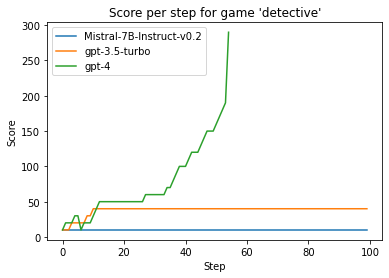

In [80]:
game_file = 'detective.z5.json'

score_per_step(
    [
        f'{mistral_dir}/{game_file}',
        f'{gpt_35_dir}/{game_file}',
        f'{gpt_4_dir}/{game_file}'
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo', 'gpt-4'],
    'detective'
    )

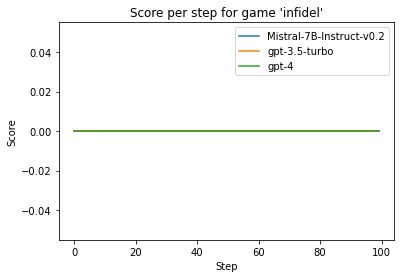

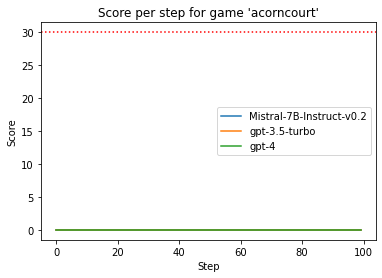

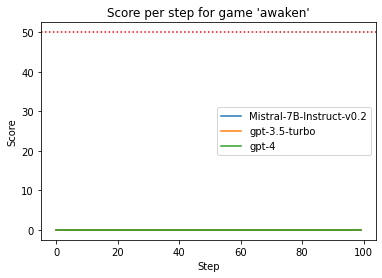

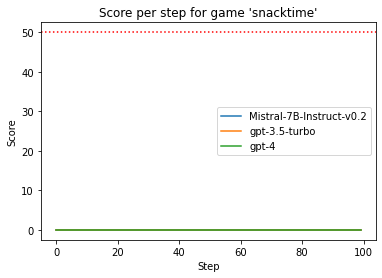

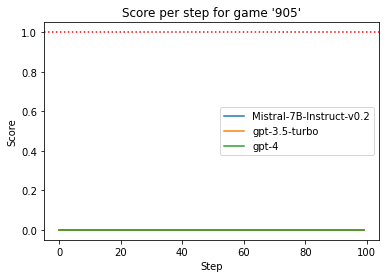

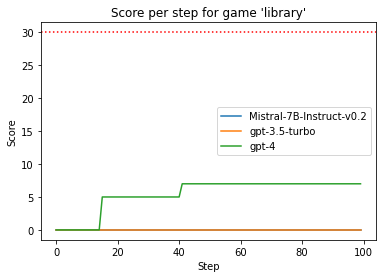

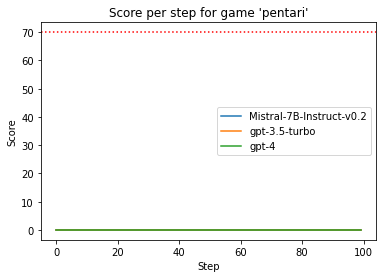

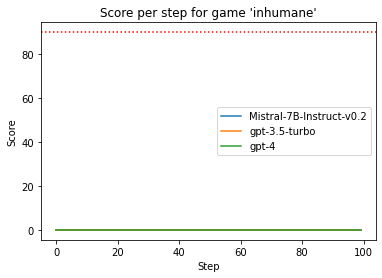

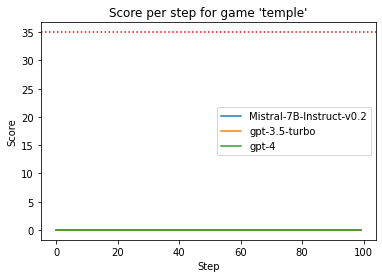

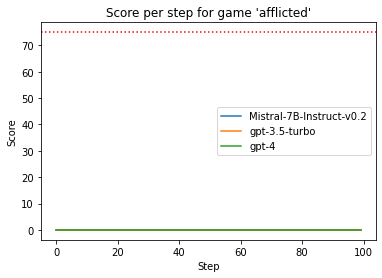

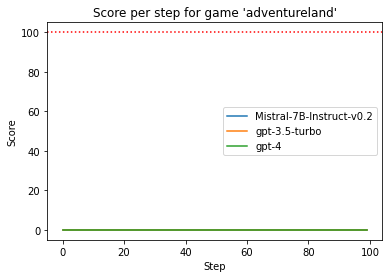

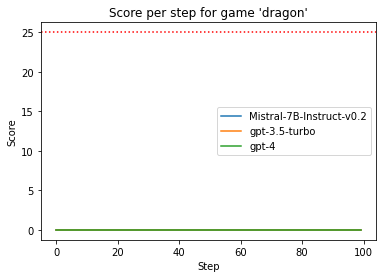

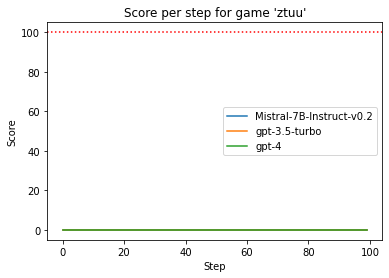

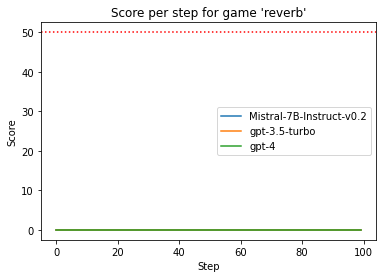

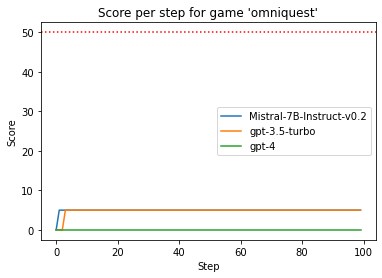

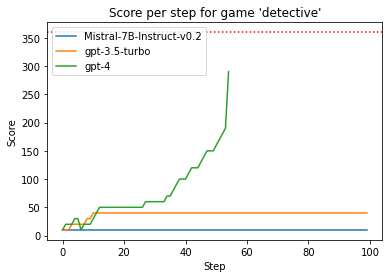

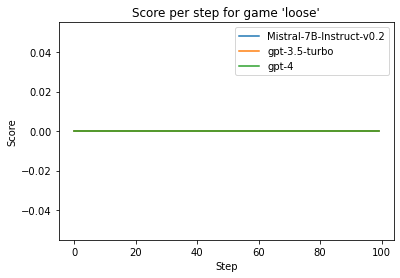

In [85]:
for game, game_file in zip(game_names, all_game_files):
    if game=='moonlit': continue # for some reason gpt 4 didn't properly log moonlit
    score_per_step(
    [
        f'{mistral_dir}/{game_file}',
        f'{gpt_35_dir}/{game_file}',
        f'{gpt_4_dir}/{game_file}'
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo', 'gpt-4'],
    game
    )

# average score per agent

In [ ]:
# bar chart, bar for each agent
# y axis is score / max score averaged across all games

In [164]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

table_2_df = pd.read_csv('../if_agents/jericho-metadata/table_2_df.csv')

def get_max_score(game_name):
    try:
        max_score = int(table_2_df[table_2_df['game'] == game_name]['max_score'])
    except:
        max_score = 'unknown'
    return max_score

def get_scores(experiment):  
    scores = []
    
    for file in os.listdir(experiment):
        if file.endswith('.json'):
            game = os.path.join(experiment, file)
            with open(game) as f:
                data = json.load(f)
                if 'score' in data[-1]:
                    score = data[-1]['score']
                if 'info' in data[-1]:
                    score = data[-1]['info']['score']
                max_score = get_max_score(file.split('.')[0])  
                if max_score == 'unknown': continue
                scores.append(score / max_score)
    if len(scores) > 0:
        return np.mean(scores)
    else:
        return None
    
def generate_graph(experiments, agent_names, llm_names):
    drrn_score = 0.164
    n_agents = len(agent_names)
    n_llms = len(llm_names)

    # Prepare results matrix based on scores
    results = np.zeros((n_agents, n_llms))
    for agent_idx, agent in enumerate(agent_names):
        for llm_idx, llm in enumerate(llm_names):
            results[agent_idx, llm_idx] = get_scores(experiments[agent_idx][llm_idx])

    barWidth = 0.1
    r = np.arange(n_agents + 1)  # Add an additional slot for DRRN

    plt.figure(figsize=(10,7))
    
    # Create bars for each llm
    for i in range(n_llms):
        plt.bar(r[:n_agents] + i*barWidth, results[:, i], width=barWidth, edgecolor='grey', label=llm_names[i])

    # Add DRRN score as a separate group, with its own color
    plt.bar(r[-1] + barWidth, drrn_score, width=barWidth, color='red', label='DRRN')

    plt.xlabel('Agents', fontweight='bold')
    plt.ylabel('Average Score / Max Score', fontweight='bold')
    plt.xticks(np.arange(len(agent_names)+1)+n_llms/20, agent_names + ['DRRN'])  # Add DRRN to labels

    # Create legend & Show graphic
    plt.legend()
    plt.show()

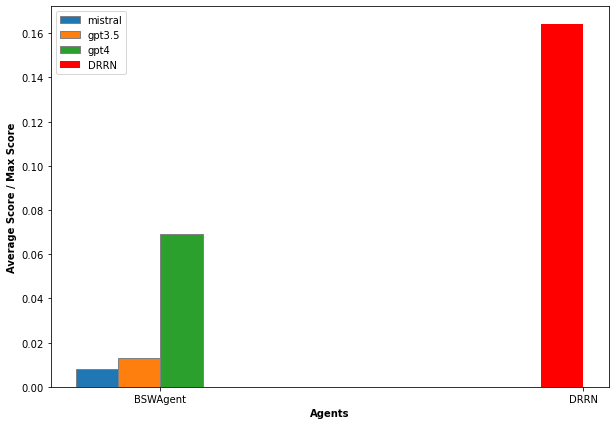

In [165]:
generate_graph(
    [[mistral_dir,gpt_35_dir,gpt_4_dir]],
    ['BSWAgent'],
    ['mistral', 'gpt3.5', 'gpt4'] # replace these with different agents
)